In [1]:
import numpy as np
import pydotplus 
from IPython.display import Image
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("german_credit.csv")

In [21]:
dataset.columns

Index([u'Creditability', u'Account Balance', u'Duration of Credit (month)',
       u'Payment Status of Previous Credit', u'Purpose', u'Credit Amount',
       u'Value Savings/Stocks', u'Length of current employment',
       u'Instalment per cent', u'Sex & Marital Status', u'Guarantors',
       u'Duration in Current address', u'Most valuable available asset',
       u'Age (years)', u'Concurrent Credits', u'Type of apartment',
       u'No of Credits at this Bank', u'Occupation', u'No of dependents',
       u'Telephone', u'Foreign Worker'],
      dtype='object')

В датасете немало категориальниых признаков. Переведем их в бинарные, которые лучше подходят для решающего дерева.

In [28]:
categorial = [u'Account Balance', 
              u'Payment Status of Previous Credit',
              u'Purpose',
              u'Value Savings/Stocks',
              u'Length of current employment', 
              u'Sex & Marital Status', 
              u'Guarantors',
              u'Most valuable available asset',
              u'Concurrent Credits',
              u'Type of apartment',
              u'Occupation',]

In [31]:
dataset=pd.get_dummies(dataset, columns=categorial)

In [32]:
y = dataset["Creditability"].values

In [39]:
dataset.drop("Creditability", 1, inplace=True)

In [45]:
from sklearn import model_selection

Результаты на кросс-валидации

In [58]:
scores = [model_selection.cross_val_score(tree.DecisionTreeClassifier(max_depth=depth), dataset, y, cv=5).mean()
               for depth in xrange(1,100)]

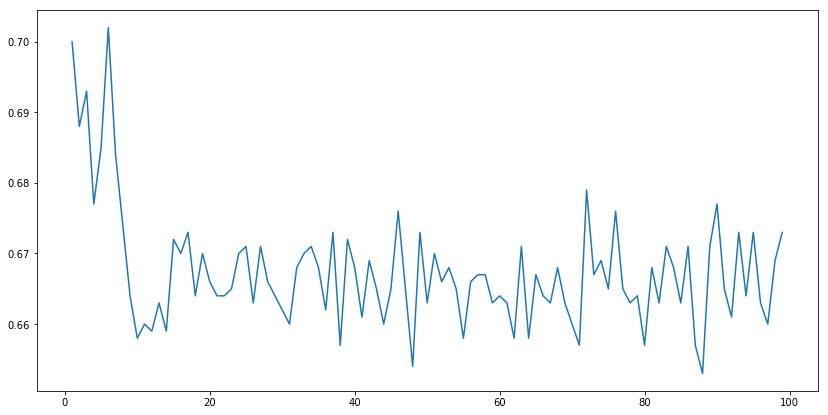

In [59]:
plt.figure(figsize=(14,7))
plt.plot(range(1,100), scores)
plt.show()

In [60]:
print "best depth = {} with accuracy score = {}".format(np.argmax(scores) + 1, max(scores))

best depth = 6 with accuracy score = 0.702


Результат на обучающей выборке

In [79]:
from sklearn import metrics

In [86]:
def train_score(depth):
    current_tree = tree.DecisionTreeClassifier(max_depth=depth)
    current_tree.fit(dataset, y)
    return metrics.accuracy_score(y, current_tree.predict(dataset))

In [87]:
scores = [train_score(depth) for depth in xrange(1,100)]

In [91]:
np.argmax(scores)

17

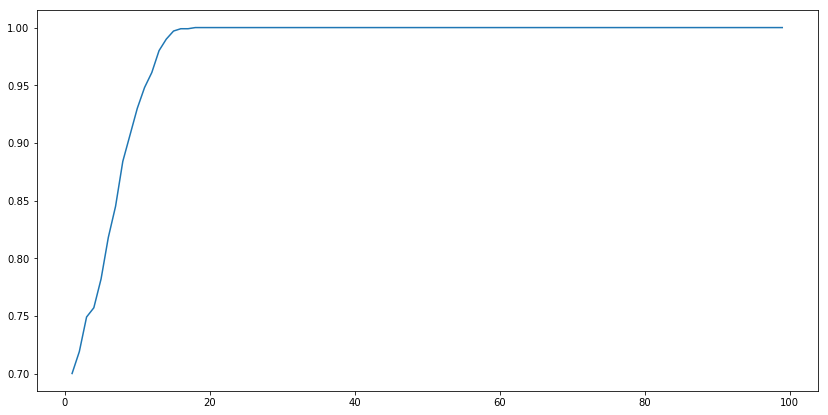

In [89]:
plt.figure(figsize=(14,7))
plt.plot(range(1,100), scores)
plt.show()

Как видно начиная с некоторой глубины 17 дерево идеально предсказывает обучающую выборку, но, как видно исходя из результата на кросс-валидации, это переобучение.

Теперь посмотрим на начальные разбиения дерева (первые 4)

In [75]:
full_tree = tree.DecisionTreeClassifier(max_depth=4)

In [76]:
full_tree.fit(dataset, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [77]:
dot_data = tree.export_graphviz(full_tree, out_file="tree2.out", 
                         feature_names=dataset.columns,  
                         class_names=['reject', 'accept'],
                         filled=True, rounded=True,  
                         special_characters=True)  

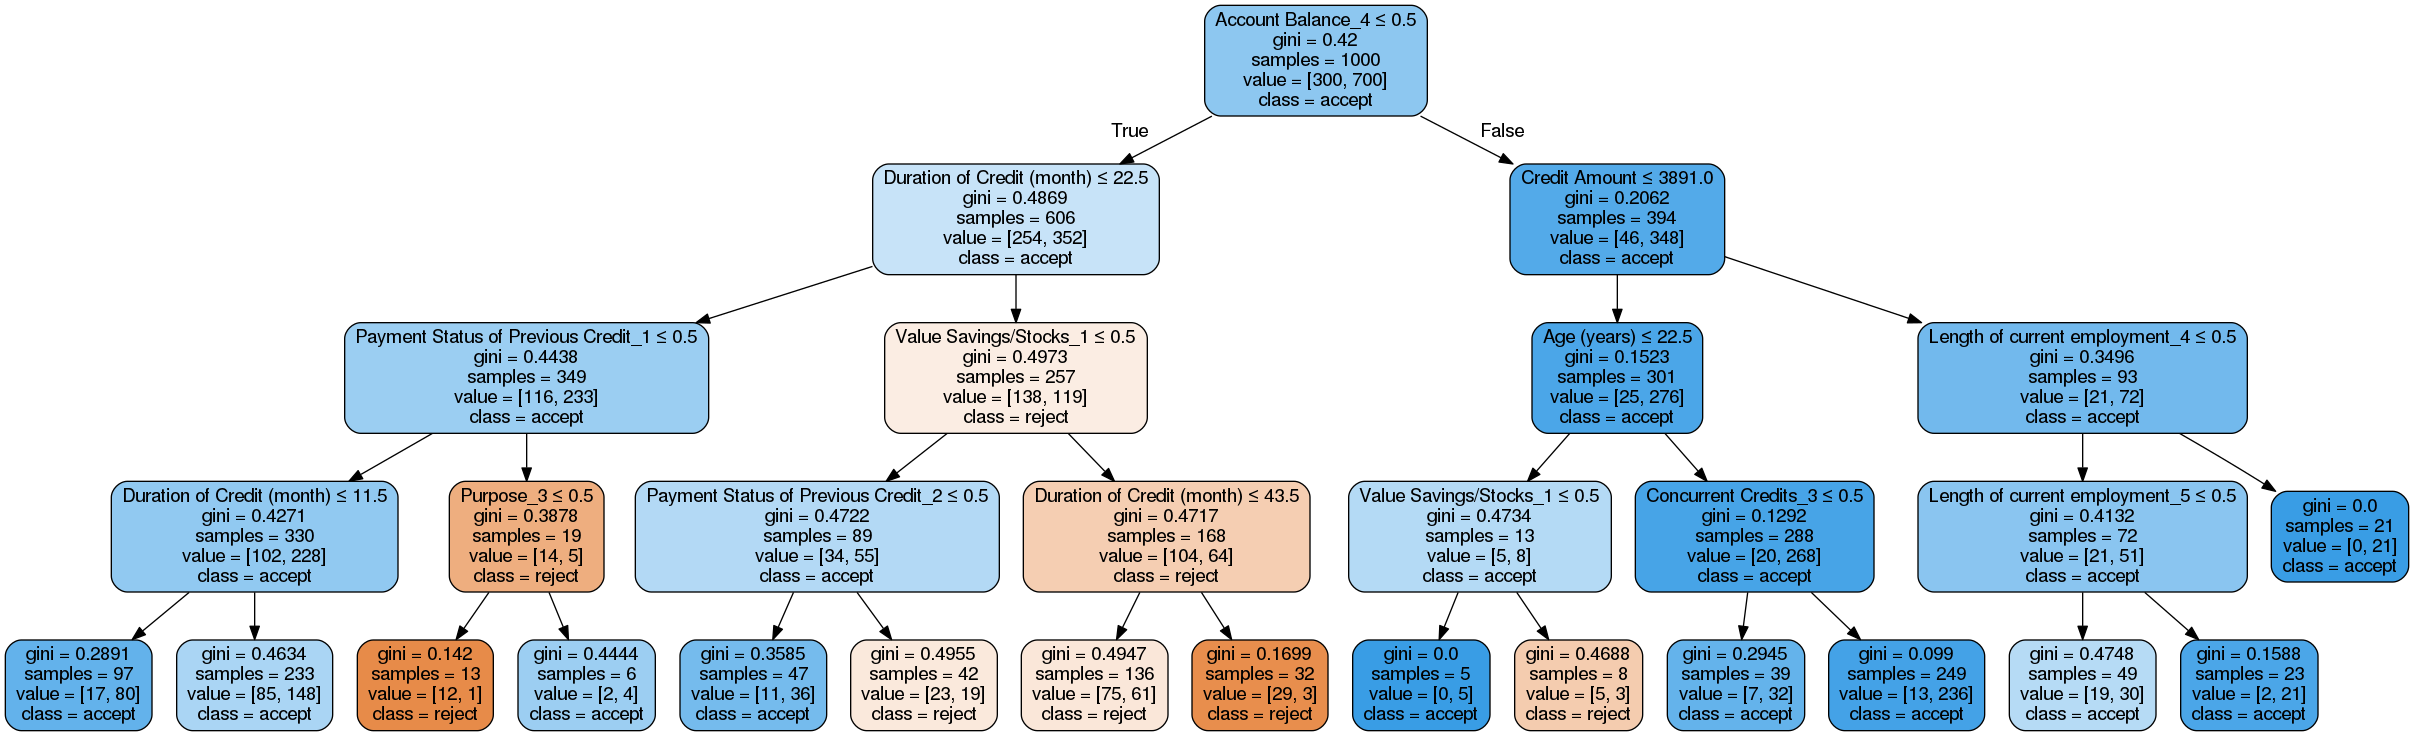

In [78]:
graph = pydotplus.graphviz.graph_from_dot_file("tree2.out")  
Image(graph.create_png())  

Первое разделение по размеру и наличию чекового счета. Почти все те кому отказали его имели. Далее важными показателями были наличие накоплений, тем у кого было менее 100 DM чаще отказывали. Краткосрочные кредиты давали охотнее. Людям с плохой кредитной историей также часто отказывали. Кридеты более чем на 44 месяца почти не давали людям без накоплений. Кредиты на большие суммы давали в основном людям трудоустроенных уже более 4 лет. 